# Pymaceuticals Inc.
---

### Analysis

- In our most recent study we were comparing the performance of Capomulin to 8 other drug regimens as well as a placebo over 45 days of treatment.  The 5 drugs with lowest average tumor volume (mm3) over the course of the study were: Ramicane (40.21),Capomulin (40.68), Propriva (52.32), Ceftamin (52.59) and Infubol (52.88). After comparing the number of Timepoints, we decided to focus our compairson on Ramicane, Capomulin, Ceftamin and Infubol since Propriva had much fewer data points than the other drug regimens. Of all the mice in the study, there were slightly more males (51%) than females (49%).  Of the top 4 identified treatments we compared box plots of the final tumor volumes (mm3) which showed that Capomulin and Ramicane were the two most promising treatments based on final tumor size. In graphing tumor size over the course of the study, we see that a Capomulin mouse had large decreases in size after day 20 and day 30. There is a strong positive correlation between mouse weight and tumor volume (mm3). 
 

In [1]:
%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results=pd.merge(study_results, mouse_metadata,how="outer",on="Mouse ID")

# Display the data table for preview
mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
mouse_total=len(mouse_results["Mouse ID"].unique())
mouse_total

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

duplicates=mouse_results[mouse_results.duplicated(["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id=mouse_results[mouse_results["Mouse ID"]=="g989"]

duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
mouse_results_cl=mouse_results.drop(labels=range(860,873))
mouse_results_cl.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_total=len(mouse_results_cl["Mouse ID"].unique())
mouse_total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means=mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians=mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances=mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdevs=mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems=mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats=pd.DataFrame({"Mean Tumor Volume":means,
                            "Median Tumor Volume":medians,
                            "Tumor Volume Variance":variances,
                            "Tumor Volume Std. Dev.":stdevs,
                            "Tumor Volume Std. Err.":sems})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

summary_stats2=pd.DataFrame(mouse_results_cl.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]))

summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

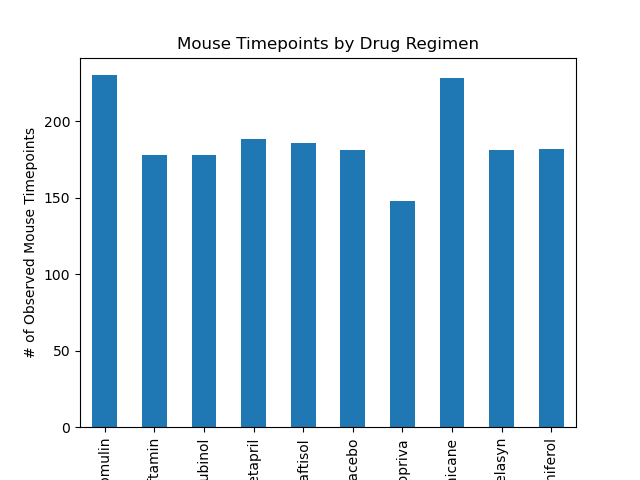

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure(1)
mouse_regimen=mouse_results_cl.groupby("Drug Regimen")["Timepoint"].count()

panda_bar=mouse_regimen.plot(kind="bar",title="Mouse Timepoints by Drug Regimen")
panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("# of Observed Mouse Timepoints")

panda_bar

plt.show()
plt.tight_layout()



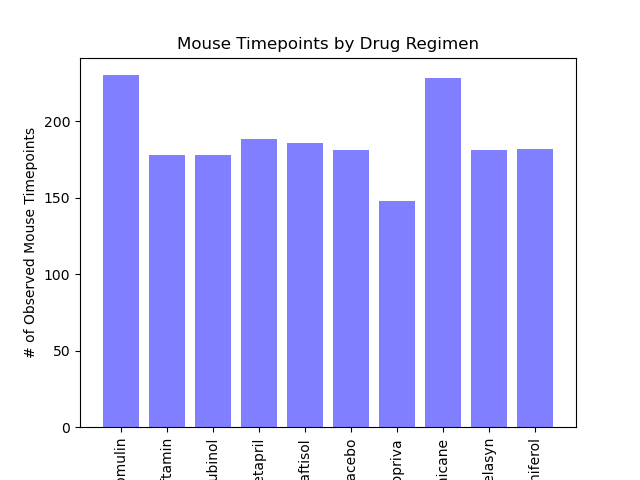

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.figure(2)
plt.clf()

drugs=mouse_regimen.keys()

plt.bar(drugs,mouse_regimen,color="blue",alpha=0.5,align="center")
plt.title("Mouse Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(drugs,rotation='vertical')
plt.ylabel("# of Observed Mouse Timepoints")


plt.show()
plt.tight_layout()

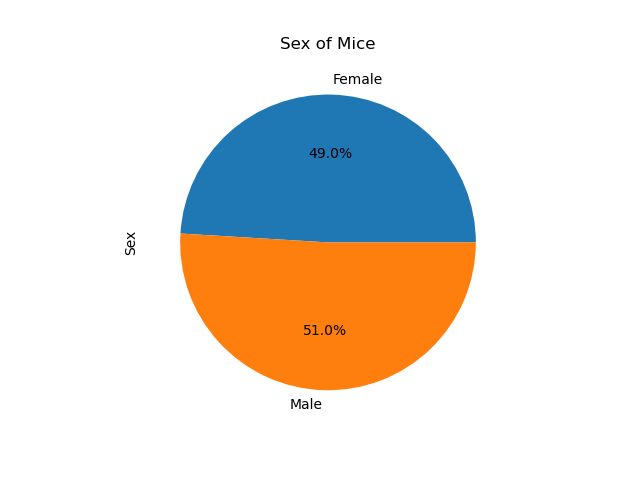

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(3)

mouse_sex=mouse_results_cl.groupby("Sex")["Mouse ID"].count()

mouse_sex.plot.pie(y="Sex", title="Sex of Mice",autopct="%1.1f%%", ylabel="Sex")

plt.show()

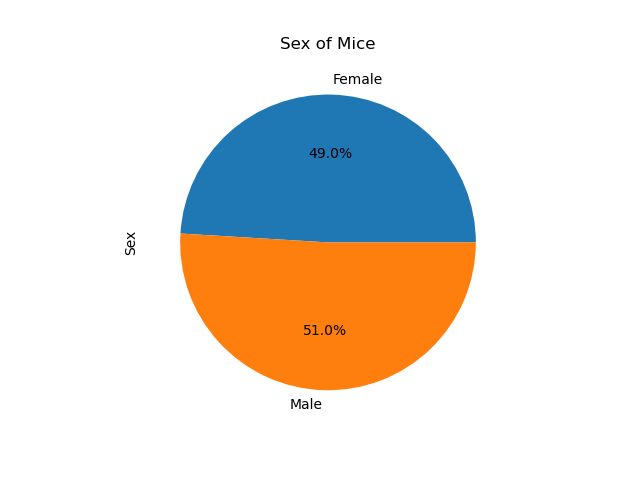

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(4)
plt.clf()
mouse_sex=mouse_results_cl.groupby("Sex")["Mouse ID"].count()
sex=mouse_sex.keys()
plt.pie(mouse_sex,labels=sex,autopct="%1.1f%%")
plt.title("Sex of Mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=mouse_results_cl.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Thanks to LA Mark for helping figure out the correct way to configure my merge

tumor_last_time=pd.merge(max_timepoint, mouse_results_cl,how="left",on=["Mouse ID","Timepoint"])

tumor_last_time


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    final_tumor_vol=tumor_last_time.loc[tumor_last_time["Drug Regimen"]==x,"Tumor Volume (mm3)"]

    #add subset 
    tumor_vol.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    #Thank you to LA Roberto Salaza for helping get my order correct 
    quartiles=final_tumor_vol.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lowerbound=lowerq-(1.5*iqr)
    upperbound=upperq+(1.5*iqr)
    outliers= final_tumor_vol.loc[(final_tumor_vol< lowerbound) | (final_tumor_vol>upperbound)]
    print(f"{x}'s potential outliers: {outliers}")

  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


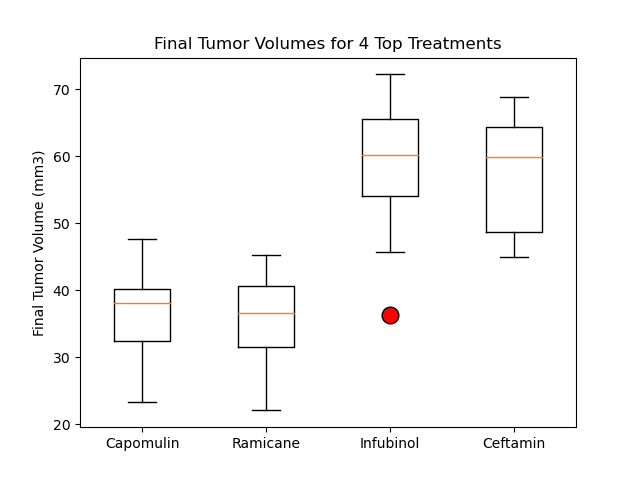

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# plt.figure(5)
# plt.clf()

flierprops=dict(marker="o",markerfacecolor="red",markersize=12)
fig, ax=plt.subplots()
ax.boxplot(tumor_vol,labels=treatments,flierprops=flierprops)
ax.set_title("Final Tumor Volumes for 4 Top Treatments")
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()
plt.tight_layout()

## Line and Scatter Plots

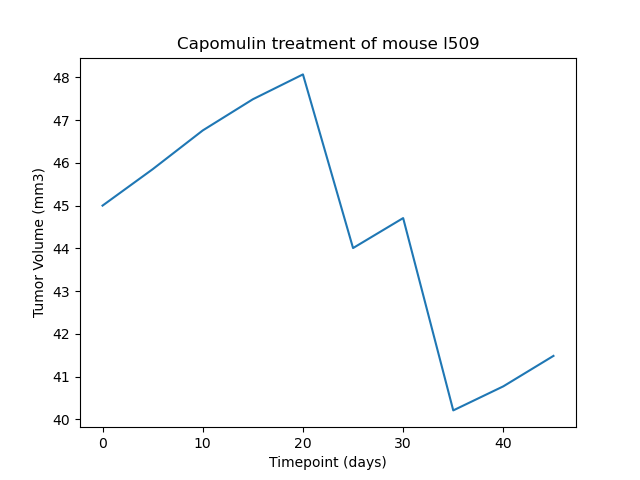

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(6)
plt.clf()
capomulin_mouse=mouse_results_cl[mouse_results_cl["Mouse ID"]=="l509"]

plt.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

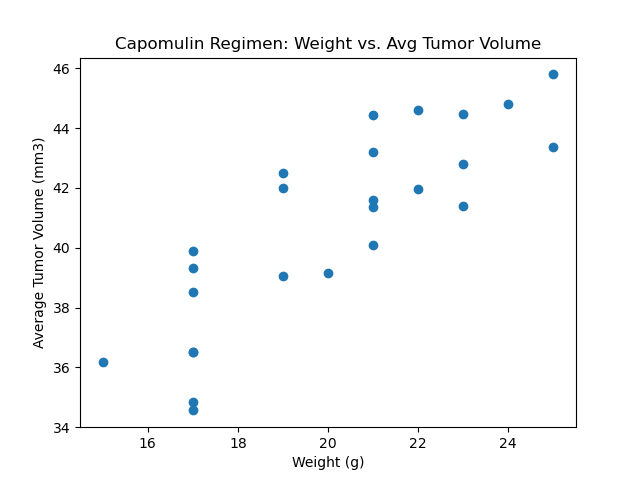

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(7)
plt.clf()
all_capomulin=mouse_results_cl[mouse_results_cl["Drug Regimen"]=="Capomulin"]

average_tumor=all_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

weights=all_capomulin.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(weights,average_tumor)
plt.title("Capomulin Regimen: Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


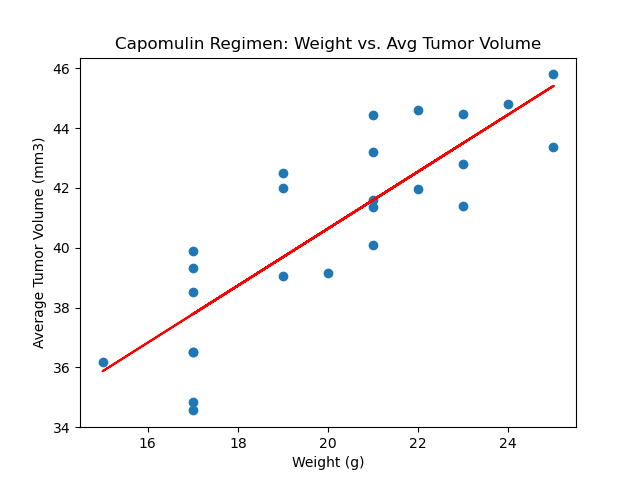

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(weights,average_tumor)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

plt.figure(8)
plt.clf()
(slope,intercept,rvalue,pvalue,stderr)=linregress(weights,average_tumor)

regress_values=weights*slope+intercept

plt.scatter(weights,average_tumor)
plt.plot(weights,regress_values, color="r")
plt.title("Capomulin Regimen: Weight vs. Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()